In [40]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [41]:
#load and preview data

data = pd.read_csv('conflict_data.csv')
data.head()

,Country_Code,Country,Year,Language_Fract,Ethnicity_Fract,Religious_Fract,Debt,Account_Balance,Corruption,Foreign_Investment,GDP,Inflation,Unemployment,Natural_Resources,Infant_Mortality,Conflict_next_5_years
0,AFG,Afghanistan,1960,0.6141,0.7693,0.2717,NaN,NaN,16.0,NaN,NaN,NaN,1.519,NaN,NaN,0
1,AFG,Afghanistan,1961,0.6141,0.7693,0.2717,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,236.5,0
2,AFG,Afghanistan,1962,0.6141,0.7693,0.2717,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,232.6,0
3,AFG,Afghanistan,1963,0.6141,0.7693,0.2717,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,228.9,0
4,AFG,Afghanistan,1964,0.6141,0.7693,0.2717,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,225.1,0


In [42]:
#Review data structure

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13329 entries, 0 to 13328
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country_Code           12680 non-null  object 
 1   Country                13329 non-null  object 
 2   Year                   13329 non-null  int64  
 3   Language_Fract         13329 non-null  float64
 4   Ethnicity_Fract        13329 non-null  float64
 5   Religious_Fract        13329 non-null  float64
 6   Debt                   8688 non-null   float64
 7   Account_Balance        7023 non-null   float64
 8   Corruption             10969 non-null  float64
 9   Foreign_Investment     8305 non-null   float64
 10  GDP                    9822 non-null   float64
 11  Inflation              8326 non-null   float64
 12  Unemployment           7547 non-null   float64
 13  Natural_Resources      9005 non-null   float64
 14  Infant_Mortality       10565 non-null  float64
 15  Co

In [43]:
#identify missing data

data.isnull()

,Country_Code,Country,Year,Language_Fract,Ethnicity_Fract,Religious_Fract,Debt,Account_Balance,Corruption,Foreign_Investment,GDP,Inflation,Unemployment,Natural_Resources,Infant_Mortality,Conflict_next_5_years
0,False,False,False,False,False,False,True,True,False,True,True,True,False,True,True,False
1,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False,False
2,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False,False
4,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13324,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
#Fill missing data using the "backfill" method

data = data.fillna(method='bfill')
data

,Country_Code,Country,Year,Language_Fract,Ethnicity_Fract,Religious_Fract,Debt,Account_Balance,Corruption,Foreign_Investment,GDP,Inflation,Unemployment,Natural_Resources,Infant_Mortality,Conflict_next_5_years
0,AFG,Afghanistan,1960,0.6141,0.7693,0.2717,280.980000,-2.693391,16.0,0.013151,3.868362,12.686269,1.519,0.302882,236.5,0
1,AFG,Afghanistan,1961,0.6141,0.7693,0.2717,280.980000,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,236.5,0
2,AFG,Afghanistan,1962,0.6141,0.7693,0.2717,280.980000,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,232.6,0
3,AFG,Afghanistan,1963,0.6141,0.7693,0.2717,280.980000,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,228.9,0
4,AFG,Afghanistan,1964,0.6141,0.7693,0.2717,280.980000,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,225.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13324,ZWE,Zimbabwe,2014,0.4472,0.3874,0.7363,55.270000,-12.337101,22.0,2.425173,0.596198,-0.212940,5.518,6.999527,40.4,0
13325,ZWE,Zimbabwe,2015,0.4472,0.3874,0.7363,58.900000,-8.407760,22.0,1.999687,0.100456,-2.409500,5.438,6.698087,38.5,0
13326,ZWE,Zimbabwe,2016,0.4472,0.3874,0.7363,59.785365,-3.493973,22.0,1.669274,-0.793566,-1.566413,5.239,6.737748,36.3,0
13327,ZWE,Zimbabwe,2017,0.4472,0.3874,0.7363,58.098825,-1.349278,22.0,1.083538,3.186399,0.909733,4.943,7.026878,35.4,0


In [45]:
#Review the statistical summary of the data

data.describe()

,Year,Language_Fract,Ethnicity_Fract,Religious_Fract,Debt,Account_Balance,Corruption,Foreign_Investment,GDP,Inflation,Unemployment,Natural_Resources,Infant_Mortality,Conflict_next_5_years
count,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000,13329.000000
mean,1989.120564,0.380126,0.398052,0.432195,52.160964,-3.473577,42.907570,5.872295,1.907043,77.493299,7.705196,6.808318,56.652772,0.167830
std,17.015950,0.288608,0.280084,0.225289,62.947626,14.086058,19.387179,51.418345,7.264246,468.572738,6.020510,11.169679,47.287093,0.373729
min,1960.000000,0.000000,0.000000,0.000000,0.000000,-240.521192,10.000000,-58.322880,-64.992373,-18.108630,0.140000,0.000000,1.400000,0.000000
25%,1974.000000,0.104900,0.131500,0.232700,17.550000,-7.296291,28.000000,0.158485,-0.386697,2.428997,3.100000,0.190569,17.900000,0.000000
50%,1989.000000,0.352600,0.412500,0.457600,38.010000,-2.671827,38.000000,0.899394,2.025823,6.596505,6.080000,1.880323,44.300000,0.000000
75%,2004.000000,0.630300,0.655000,0.624900,65.700000,0.847561,57.000000,2.910699,4.682769,12.727767,10.900000,8.092714,86.000000,0.000000
max,2018.000000,0.922700,0.930200,0.860300,2092.920000,67.604523,88.000000,1282.632552,140.370770,23773.131770,37.939999,89.004311,279.400000,1.000000


In [46]:
#Drop columns that should not be used as predictor variables

data.drop(columns = ['Country_Code', 'Country','Year'], inplace = True)
data.head()

,Language_Fract,Ethnicity_Fract,Religious_Fract,Debt,Account_Balance,Corruption,Foreign_Investment,GDP,Inflation,Unemployment,Natural_Resources,Infant_Mortality,Conflict_next_5_years
0,0.6141,0.7693,0.2717,280.98,-2.693391,16.0,0.013151,3.868362,12.686269,1.519,0.302882,236.5,0
1,0.6141,0.7693,0.2717,280.98,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,236.5,0
2,0.6141,0.7693,0.2717,280.98,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,232.6,0
3,0.6141,0.7693,0.2717,280.98,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,228.9,0
4,0.6141,0.7693,0.2717,280.98,-2.693391,16.0,0.013151,3.868362,12.686269,2.976,0.302882,225.1,0


Language_Fract


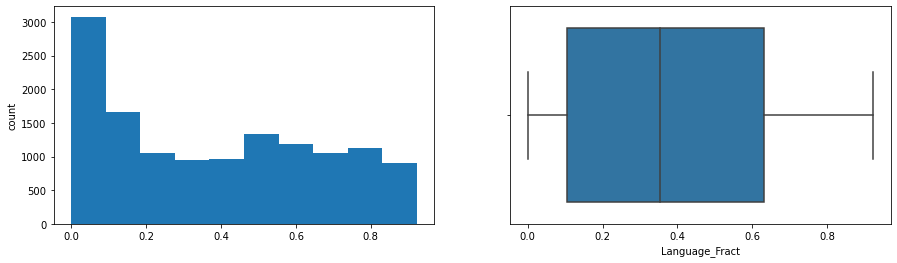

Ethnicity_Fract


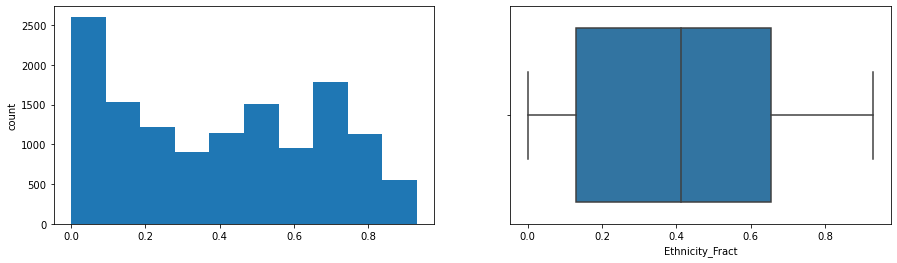

Religious_Fract


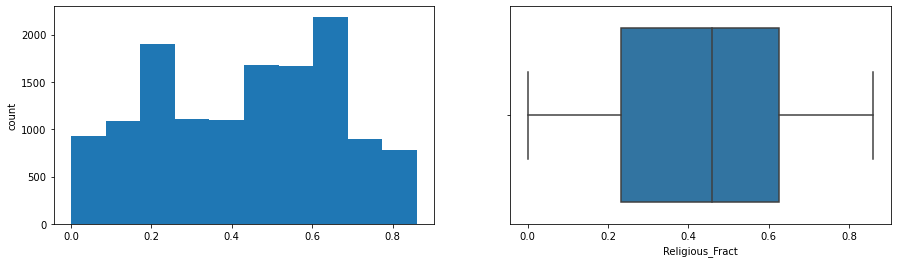

Debt


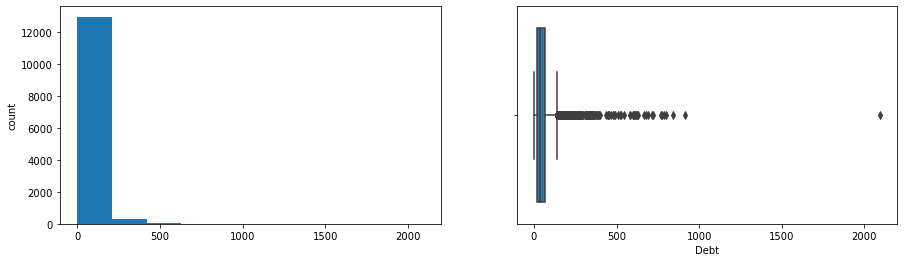

Account_Balance


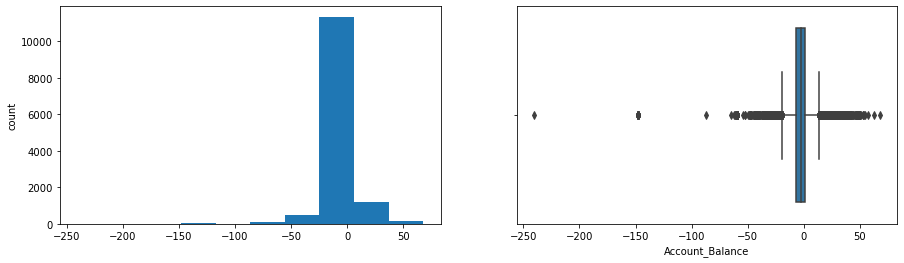

Corruption


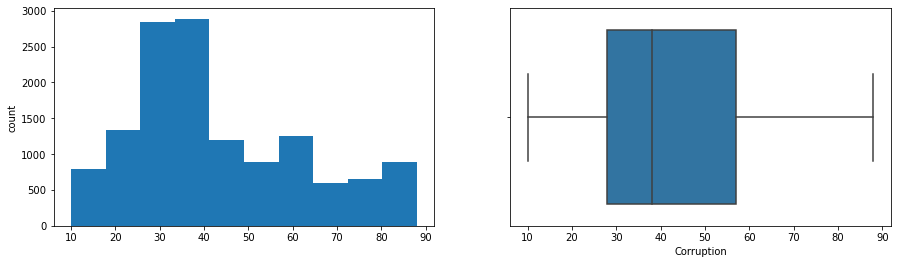

Foreign_Investment


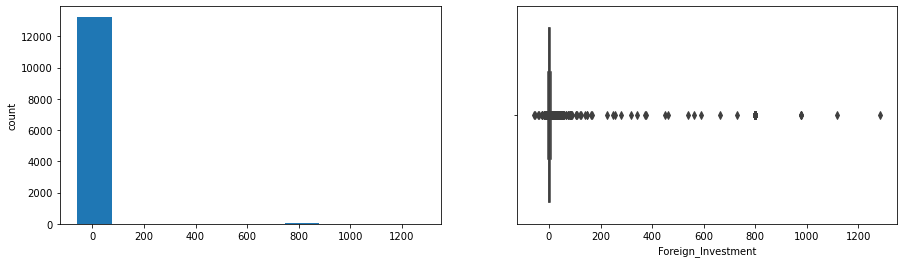

GDP


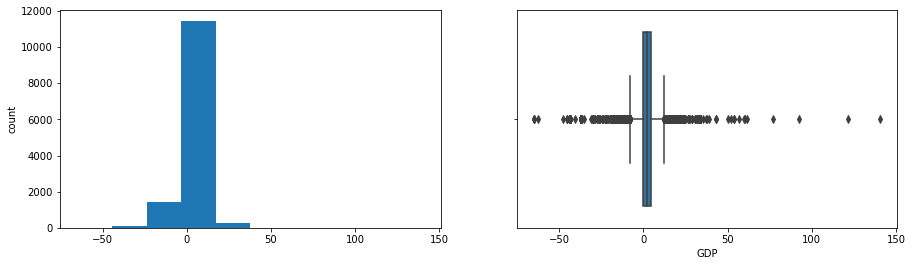

Inflation


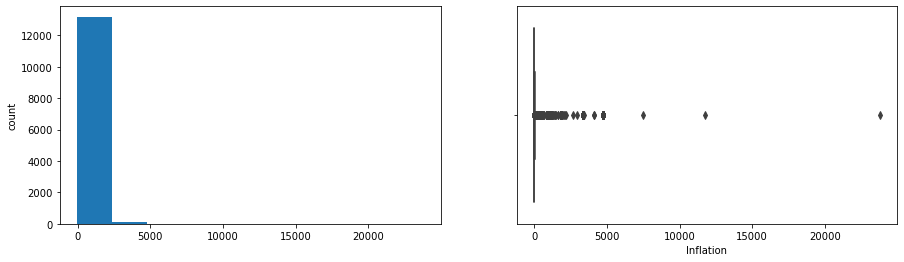

Unemployment


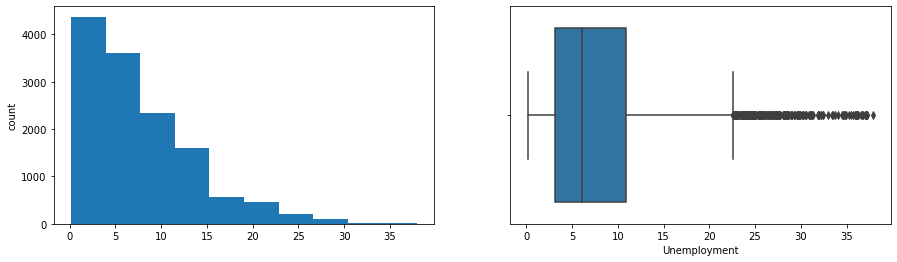

Natural_Resources


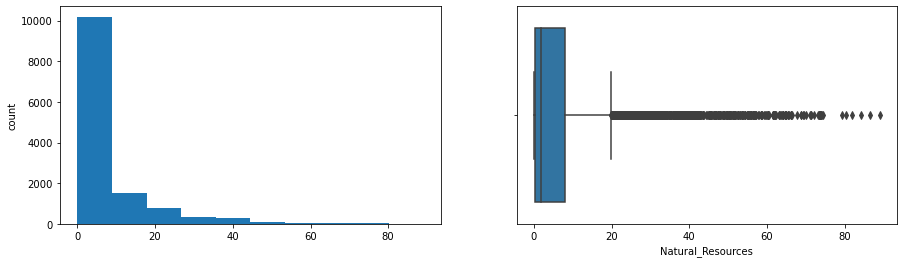

Infant_Mortality


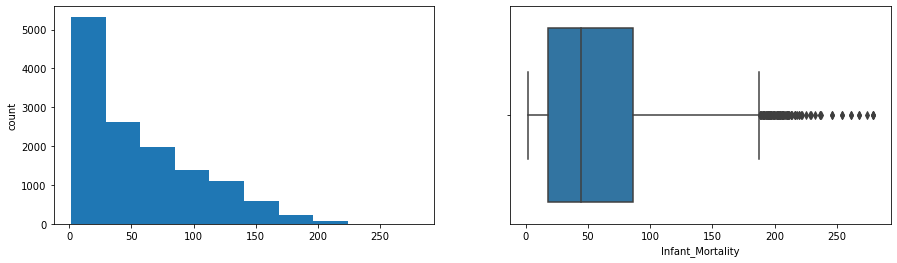

Conflict_next_5_years


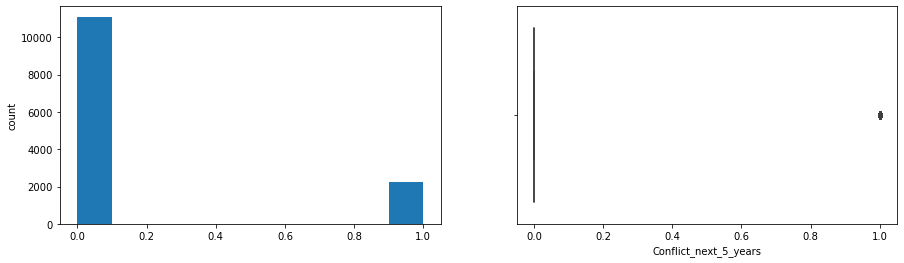

In [47]:
#Create histograms and boxplots to visualize and understand the dataset

for col in data.columns:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

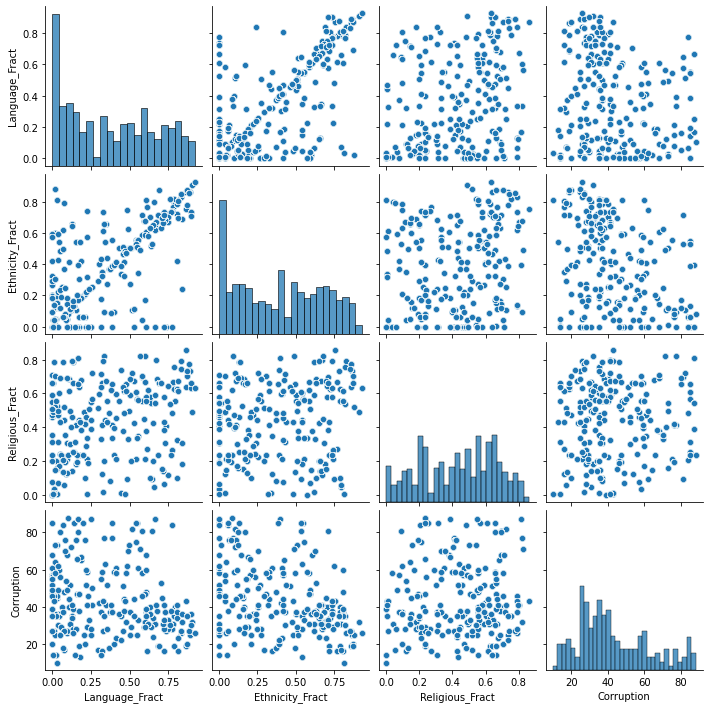

In [48]:
#Create a pairplot to visualize if there is any correlation among the predictor variables

pairdata = data.drop([
'Debt',
'Account_Balance',
'Foreign_Investment',
'Unemployment',
'Natural_Resources',
'Infant_Mortality',
'GDP',
'Inflation',
'Conflict_next_5_years'], axis=1)

sns.pairplot(pairdata)

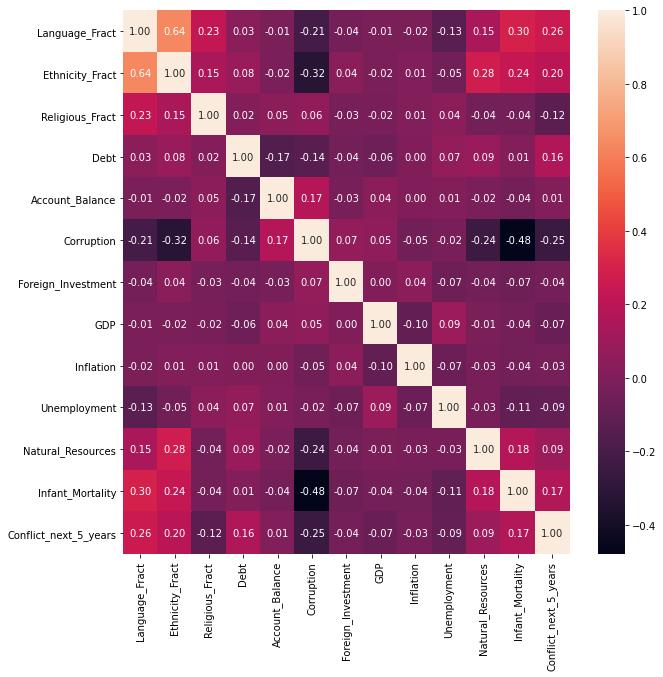

In [49]:
#Create a heatmap to visualize the level of correlation between the predictor variables

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

In [50]:
#Calculate Variance Inflation Factor (VIF) to check for any multicollinearity

import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

X = data

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [inf.variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  feature       VIF
0          Language_Fract  5.293272
1         Ethnicity_Fract  5.376924
2         Religious_Fract  4.764030
3                    Debt  1.785984
4         Account_Balance  1.101600
5              Corruption  3.556614
6      Foreign_Investment  1.041453
7                     GDP  1.098573
8               Inflation  1.038335
9            Unemployment  2.472039
10      Natural_Resources  1.523298
11       Infant_Mortality  2.495924
12  Conflict_next_5_years  1.386367


In [51]:
#Scale data

scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Language_Fract,Ethnicity_Fract,Religious_Fract,Debt,Account_Balance,Corruption,Foreign_Investment,GDP,Inflation,Unemployment,Natural_Resources,Infant_Mortality,Conflict_next_5_years
0,0.810729,1.325541,-0.712423,3.635207,0.055389,-1.387957,-0.113955,0.270006,-0.138312,-1.027559,-0.582441,3.803447,-0.449084
1,0.810729,1.325541,-0.712423,3.635207,0.055389,-1.387957,-0.113955,0.270006,-0.138312,-0.785544,-0.582441,3.803447,-0.449084
2,0.810729,1.325541,-0.712423,3.635207,0.055389,-1.387957,-0.113955,0.270006,-0.138312,-0.785544,-0.582441,3.720969,-0.449084
3,0.810729,1.325541,-0.712423,3.635207,0.055389,-1.387957,-0.113955,0.270006,-0.138312,-0.785544,-0.582441,3.642721,-0.449084
4,0.810729,1.325541,-0.712423,3.635207,0.055389,-1.387957,-0.113955,0.270006,-0.138312,-0.785544,-0.582441,3.562358,-0.449084


In [52]:
#Split data into training and test datasets

from sklearn import model_selection
label = data['Conflict_next_5_years']
features = data.drop('Conflict_next_5_years', axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, random_state=42, test_size=.20)
print('The train dataset has {} data\nThe test dataset has {} data'.
    format(x_train.shape[0], x_test.shape[0]))

The train dataset has 10663 data
The test dataset has 2666 data


In [53]:
#Train Logistic Regression model and run performance metrics

from sklearn.metrics import classification_report
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(x_train, y_train)
preds = logreg_model.predict(x_test)
preds_proba = logreg_model.predict_proba(x_test)
print('Classification Report \n', classification_report(y_test, logreg_model.predict(x_test)))

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      2223
           1       0.46      0.13      0.21       443

    accuracy                           0.83      2666
   macro avg       0.65      0.55      0.56      2666
weighted avg       0.78      0.83      0.79      2666



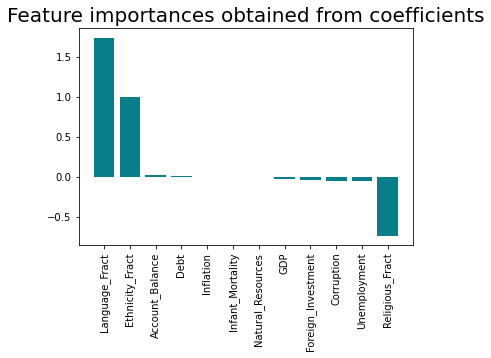

In [54]:
#identify feature importances for the Logistic Regression model

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': logreg_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

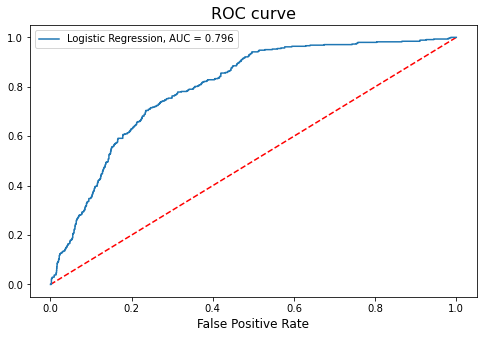

In [55]:
#Plot AUC curve

from sklearn.metrics import roc_auc_score
#ROC AUC
fig = plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'r--')
preds_proba_logreg_model = logreg_model.predict_proba(x_test)
probslogreg_model = preds_proba_logreg_model[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslogreg_model)
auclogreg_model = roc_auc_score(y_test, probslogreg_model)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclogreg_model, 3))}')
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()

In [56]:
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from sklearn.metrics import accuracy_score

[Text(488.25, 378.5785714285714, 'Language_Fract <= 0.786\ngini = 0.28\nsamples = 10663\nvalue = [8869, 1794]\nclass = 0'),
 Text(348.75, 320.3357142857143, 'Corruption <= 39.5\ngini = 0.223\nsamples = 9447\nvalue = [8240, 1207]\nclass = 0'),
 Text(279.0, 262.09285714285716, 'Religious_Fract <= 0.517\ngini = 0.341\nsamples = 4590\nvalue = [3590, 1000]\nclass = 0'),
 Text(209.25, 203.85, 'Ethnicity_Fract <= 0.192\ngini = 0.414\nsamples = 3109\nvalue = [2198, 911]\nclass = 0'),
 Text(139.5, 145.60714285714283, 'gini = 0.146\nsamples = 810\nvalue = [746, 64]\nclass = 0'),
 Text(279.0, 145.60714285714283, 'Language_Fract <= 0.427\ngini = 0.465\nsamples = 2299\nvalue = [1452, 847]\nclass = 0'),
 Text(139.5, 87.3642857142857, 'Debt <= 326.316\ngini = 0.389\nsamples = 1216\nvalue = [894, 322]\nclass = 0'),
 Text(69.75, 29.121428571428567, 'gini = 0.339\nsamples = 1124\nvalue = [881, 243]\nclass = 0'),
 Text(209.25, 29.121428571428567, 'gini = 0.243\nsamples = 92\nvalue = [13, 79]\nclass = 1')

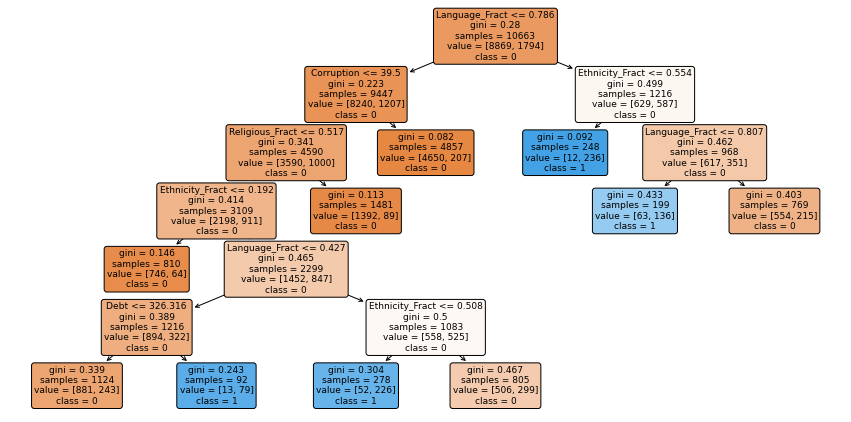

In [57]:
#Run the CART algorithm and perform prediction. 

X_names = ['Language_Fract',
'Ethnicity_Fract',
'Religious_Fract',
'Debt',
'Account_Balance',
'Corruption',
'Foreign_Investment',
'GDP',
'Inflation',
'Unemployment',
'Natural_Resources',
'Infant_Mortality' ]

y_names = ["0", "1"]

cartapproval01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=10).fit(x_train,y_train)

predApprovalCART = cartapproval01.predict(x_test)

dfpred = pd.DataFrame(y_test)

dfpred['Predicted'] = predApprovalCART
dfpred.to_csv(r'CART_training.csv')

plt.figure(figsize=(15, 7.5))
tree.plot_tree(cartapproval01, filled= True, rounded = True, feature_names=X_names, class_names=y_names)

In [58]:
#Generate performance metrics for Decision Tree

print('Classification Report \n', classification_report(y_test, predApprovalCART))

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94      2223
           1       0.84      0.40      0.54       443

    accuracy                           0.89      2666
   macro avg       0.87      0.69      0.74      2666
weighted avg       0.88      0.89      0.87      2666



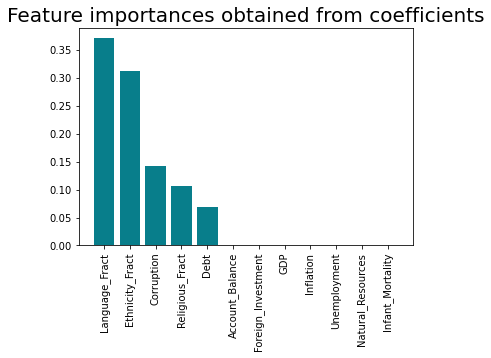

In [59]:
#identify feature importances for the Decision Tree model

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': cartapproval01.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
#Train Random Forest model

from sklearn.ensemble import RandomForestClassifier

#run randon forests algorithm on training data

rfy = np.ravel(y_train)
rf1 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(x_train,rfy)

predApprovalRF = rf1.predict(x_train)

dfpred = pd.DataFrame(rfy)
dfpred['Predicted_training'] = predApprovalRF
#dfpred.to_csv(r'RandomForest_training.csv')
dfpred

,0,Predicted_training
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
10658,0,0
10659,0,0
10660,1,1
10661,0,0


In [61]:
#Run randon forest model on test data and export to CSV file report.

rfy = np.ravel(y_test)

predApprovalRF2 = rf1.predict(x_test)

dfpred = pd.DataFrame(rfy)

dfpred['Predicted_test'] = predApprovalRF2
dfpred
dfpred.to_csv(r'RandomForest_test.csv')

In [62]:
print('Classification Report \n', classification_report(y_test, predApprovalRF2))

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2223
           1       0.93      0.82      0.87       443

    accuracy                           0.96      2666
   macro avg       0.95      0.90      0.92      2666
weighted avg       0.96      0.96      0.96      2666



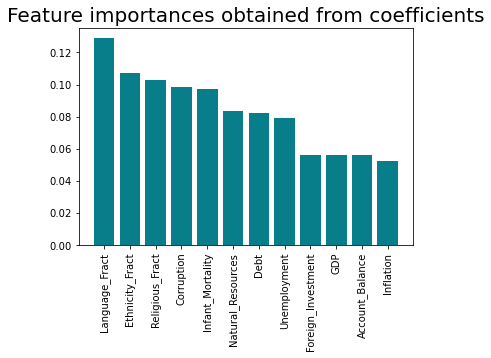

In [63]:
#identify feature importances for the Random Forest model

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': rf1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
#Train the Naive_Bayes model

from sklearn.naive_bayes import GaussianNB

Naive_Bayes = GaussianNB()
Naive_Bayes.fit(x_train, y_train)
prediction_results = Naive_Bayes.predict(x_test)  
print(prediction_results)

[0 0 0 ... 1 1 1]


In [65]:
print('Classification Report \n', classification_report(y_test, prediction_results))

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.58      0.73      2223
           1       0.30      0.90      0.45       443

    accuracy                           0.63      2666
   macro avg       0.63      0.74      0.59      2666
weighted avg       0.86      0.63      0.68      2666



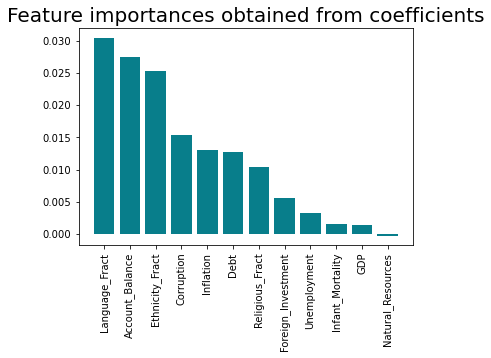

In [66]:
#identify feature importances for the Naive_Bayes model

from sklearn.inspection import permutation_importance
imps = permutation_importance(Naive_Bayes, x_test, y_test)

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': imps.importances_mean
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
#Train the k-nearest neighbors model and generate performance metrics

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
prediction_results = knn.predict(x_test)
print('Classification Report \n', classification_report(y_test, prediction_results))

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2223
           1       0.89      0.69      0.78       443

    accuracy                           0.94      2666
   macro avg       0.92      0.84      0.87      2666
weighted avg       0.93      0.94      0.93      2666



Feature: 0  Score: 7.502579011537946e-05
Feature: 1  Score: 0.0
Feature: 2  Score: 3.751289505768973e-05
Feature: 3  Score: 0.12187939604238962
Feature: 4  Score: 0.03595610991278257
Feature: 5  Score: 0.0925818250023446
Feature: 6  Score: 0.0053455875457188995
Feature: 7  Score: 0.018231266998030616
Feature: 8  Score: 0.06639782425208669
Feature: 9  Score: 0.02380193191409552
Feature: 10  Score: 0.038338178748945004
Feature: 11  Score: 0.1440495170214762


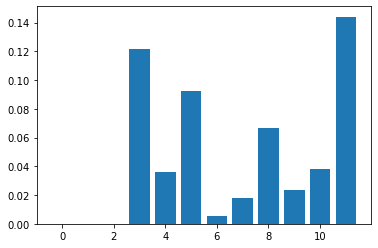

In [68]:
#identify feature importances for the k-nearest neighbors model

results = permutation_importance(knn, x_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))] ,importance)
plt.show()